# Non-linear Transformations Distributions
Investigate the probability distribution of f(x)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis as scipy_kurtosis

### Generate Sample of x

We sample from the gaussian 

In [2]:
size = 100000
sample = np.random.normal(size=size)

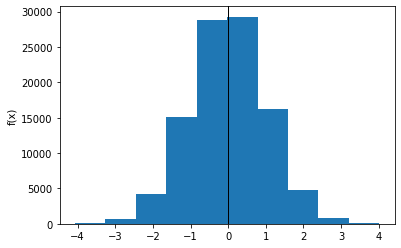

In [3]:
# Plot Histogram
ax = plt.hist(sample)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

### Transformation functions

##### Functions

In [4]:
concave_convex_fn = lambda x: np.abs(x)*x 

def convex_concave_fn(x):
    
    is_positive = x>=0
    sign = is_positive+~is_positive*-1
    
    sqrt_of_abs = np.sqrt(np.abs(x))
    
    y = sqrt_of_abs*sign
    
    return y

### Transform X

##### Convex Concave Transformation
I expected this to just thin the tails but my choice of function returns a bimodal f(x) distribution.

In [5]:
x = sample
y = convex_concave_fn(sample)

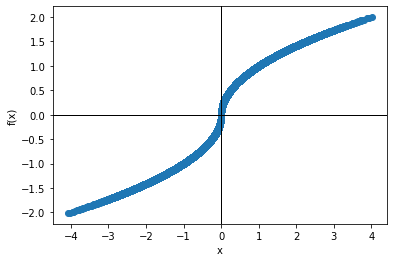

In [6]:
# Plot Mapping
ax = plt.scatter(x,y)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

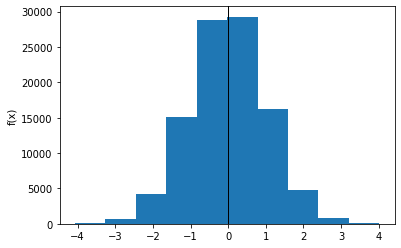

In [7]:
# Plot x Histogram
ax = plt.hist(x)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

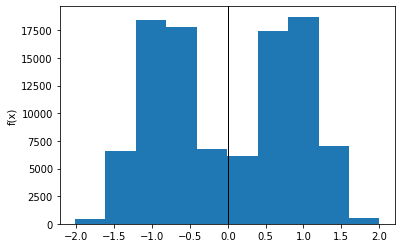

In [8]:
# Plot f(x) Histogram
ax = plt.hist(y)
plt.ylabel('f(x)')
plt.axhline(color='k', linewidth=1)
plt.axvline(color='k', linewidth=1)
plt.show()

In [9]:
df = pd.DataFrame([x,y], index=['x','f(x)']).T

In [10]:
df.apply(scipy_kurtosis, **{'fisher':False}).to_frame().T.rename(index={0:'kurtosis'})

,x,f(x)
kurtosis,2.997811,1.573222


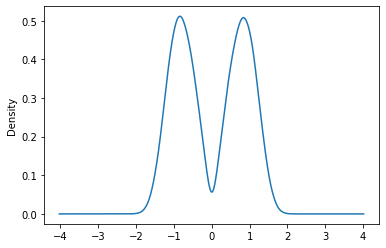

In [11]:
pd.Series(y).plot.kde()

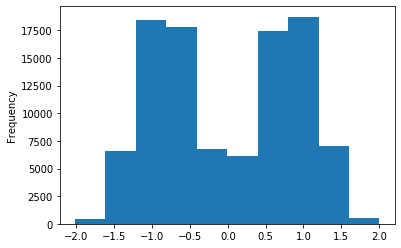

In [12]:
pd.Series(y).plot(kind='hist')

# Conclusions

* S shape (convex-concave) makes the distribution bimodal
    * This happens roughly because f(x) passes too quickly through zero as you increment x for this choice of function